In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
image_path_1 = "/content/drive/MyDrive/University_College,_University_of_Toronto.jpg"
image_path_2 = "/content/drive/MyDrive/University_College_Lawn,_University_of_Toronto,_Canada.jpg"


image1 = cv2.imread(image_path_1, cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread(image_path_2, cv2.IMREAD_GRAYSCALE)

if image1 is None or image2 is None:
    raise FileNotFoundError("Error.")
scale_percent = 70
image1 = cv2.resize(image1, (int(image1.shape[1] * scale_percent / 100), int(image1.shape[0] * scale_percent / 100)))
image2 = cv2.resize(image2, (int(image2.shape[1] * scale_percent / 100), int(image2.shape[0] * scale_percent / 100)))



In [ ]:
def compute_gradients(image, sigma=1.0):
    smoothed = cv2.GaussianBlur(image, (5, 5), sigmaX=sigma, sigmaY=sigma)
    I_x = cv2.Sobel(smoothed, cv2.CV_64F, 1, 0, ksize=5)
    I_y = cv2.Sobel(smoothed, cv2.CV_64F, 0, 1, ksize=5)
    return I_x, I_y


In [ ]:
def second_moment_matrix(I_x, I_y, sigma=1.0):
    I_x2, I_y2, I_xy = I_x**2, I_y**2, I_x * I_y
    S_xx = cv2.GaussianBlur(I_x2, (5, 5), sigmaX=sigma, sigmaY=sigma)
    S_yy = cv2.GaussianBlur(I_y2, (5, 5), sigmaX=sigma, sigmaY=sigma)
    S_xy = cv2.GaussianBlur(I_xy, (5, 5), sigmaX=sigma, sigmaY=sigma)
    return S_xx, S_yy, S_xy

In [ ]:
def compute_eigenvalues(S_xx, S_yy, S_xy):
    trace = S_xx + S_yy
    determinant = S_xx * S_yy - S_xy ** 2
    lambda1 = (trace + np.sqrt(trace ** 2 - 4 * determinant)) / 2
    lambda2 = (trace - np.sqrt(trace ** 2 - 4 * determinant)) / 2
    return lambda1, lambda2

<ipython-input-31-18a5cd16e123>:4: RuntimeWarning: invalid value encountered in sqrt
  lambda1 = (trace + np.sqrt(trace ** 2 - 4 * determinant)) / 2
<ipython-input-31-18a5cd16e123>:5: RuntimeWarning: invalid value encountered in sqrt
  lambda2 = (trace - np.sqrt(trace ** 2 - 4 * determinant)) / 2


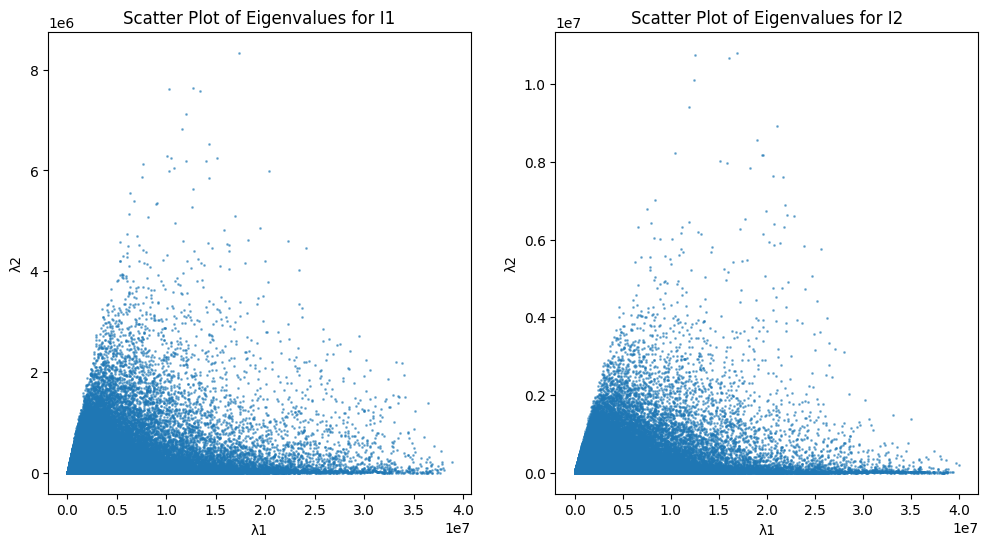

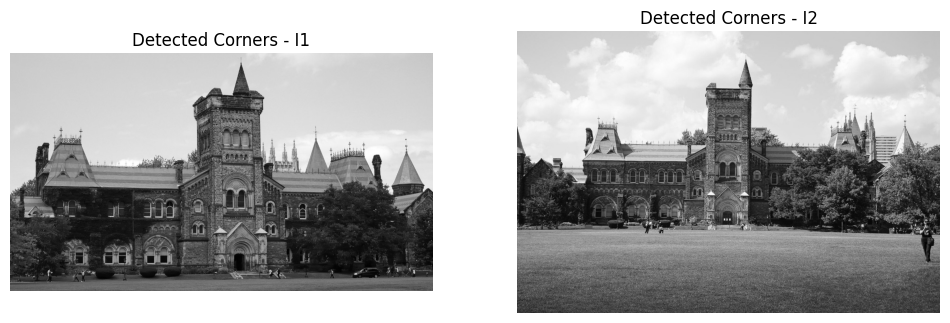

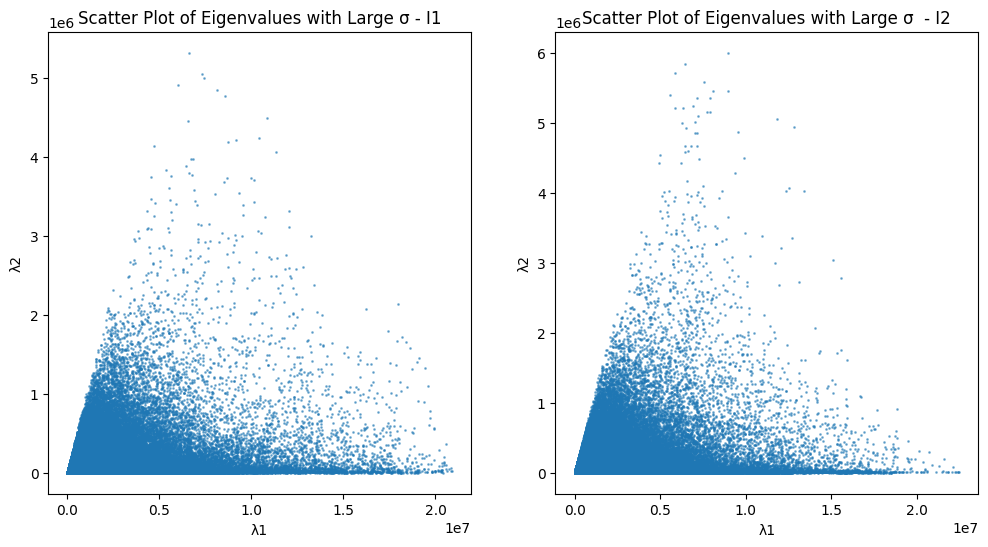

In [ ]:
from re import S
#4compute gradients.
I_x1, I_y1 = compute_gradients(image1)
I_x2, I_y2 = compute_gradients(image2)



#4.compute Second moment matrices M
S_xx1, S_yy1, S_xy1 = second_moment_matrix(I_x1, I_y1)
S_xx2, S_yy2, S_xy2 = second_moment_matrix(I_x2, I_y2)

#4.1alculating eigens
lambda1_1, lambda2_1 = compute_eigenvalues(S_xx1, S_yy1, S_xy1)
lambda1_2, lambda2_2 = compute_eigenvalues(S_xx2, S_yy2, S_xy2)


fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].scatter(lambda1_1.flatten(), lambda2_1.flatten(), s=1, alpha=0.5)
axes[0].set_xlabel("λ1")
axes[0].set_ylabel("λ2")
axes[0].set_title("Scatter Plot of Eigenvalues for I1")

axes[1].scatter(lambda1_2.flatten(), lambda2_2.flatten(), s=1, alpha=0.5)
axes[1].set_xlabel("λ1")
axes[1].set_ylabel("λ2")
axes[1].set_title("Scatter Plot of Eigenvalues for I2")

plt.show()

threshold = 0.01 * np.max([lambda1_1, lambda2_1])
corners1 = np.minimum(lambda1_1, lambda2_1) > threshold
corners2 = np.minimum(lambda1_2, lambda2_2) > threshold

#marking
corner_img1 = cv2.cvtColor(image1, cv2.COLOR_GRAY2BGR)
corner_img2 = cv2.cvtColor(image2, cv2.COLOR_GRAY2BGR)

corner_img1[corners1] = [0, 0, 255]
corner_img2[corners2] = [0, 0, 255]

#showing images with detected corners
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(corner_img1)
axes[0].set_title("Detected Corners - I1")
axes[0].axis("off")

axes[1].imshow(corner_img2)
axes[1].set_title("Detected Corners - I2")
axes[1].axis("off")

plt.show()


I_x1_large, I_y1_large = compute_gradients(image1, sigma=5.0)
I_x2_large, I_y2_large = compute_gradients(image2, sigma=5.0)

S_xx1_large, S_yy1_large, S_xy1_large = second_moment_matrix(I_x1_large, I_y1_large, sigma=5.0)
S_xx2_large, S_yy2_large, S_xy2_large = second_moment_matrix(I_x2_large, I_y2_large, sigma=5.0)

lambda1_1_large, lambda2_1_large = compute_eigenvalues(S_xx1_large, S_yy1_large, S_xy1_large)
lambda1_2_large, lambda2_2_large = compute_eigenvalues(S_xx2_large, S_yy2_large, S_xy2_large)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].scatter(lambda1_1_large.flatten(), lambda2_1_large.flatten(), s=1, alpha=0.5)
axes[0].set_xlabel("λ1")
axes[0].set_ylabel("λ2")
axes[0].set_title("Scatter Plot of Eigenvalues with Large σ - I1")

axes[1].scatter(lambda1_2_large.flatten(), lambda2_2_large.flatten(), s=1, alpha=0.5)
axes[1].set_xlabel("λ1")
axes[1].set_ylabel("λ2")
axes[1].set_title("Scatter Plot of Eigenvalues with Large σ  - I2")

plt.show()